In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from mpl_toolkits import mplot3d

Every LP problem (Primal) has a complementary problem called Dual

By formal definition: 

For a given LP:
<br>
    
    max c · x subject to Ax ≤ b, x ≥ 0.
    
It's Dual is written as:
<br>
    min b · y subject to yA ≥ c, y ≥ 0

In other words, every maximisation problem, canbe formulated as a minimisation problem and vice versa

To understand this better, consider the LP has `n` variables and `m` constraints. This means
<br>

- Shape of c: n 
- Shape of b: m 
- Shape of A: m x n

<br>

Let's understand this with an example
Consider the following problem
    
Maximise Z = 3$x_{1}$ + 4$x_{2}$

Subject to

1. 0.5$x_{1}$ + 2$x_{2}$ <= 30

2. 3$x_{1}$ + $x_{2}$ <= 25

3. $x_{1}$, $x_{2}$ >=0

Here 
<br>

$c =  \begin{bmatrix} 3 \\ 4 \end{bmatrix}$

<br>

$A =  \begin{bmatrix} 0.5 & 2 \\ 3 & 1 \end{bmatrix}$

<br>

$b =  \begin{bmatrix} 30 \\ 25 \end{bmatrix}$



Standardising the problem with slack variables
Maximise Z = 3$x_{1}$ + 4$x_{2}$

Subject to

1. 0.5$x_{1}$ + 2$x_{2}$ + $s_{1}$= 30

2. 3$x_{1}$ + $x_{2}$ + $s_{2}$= 25

3. $x_{1}$, $x_{2}$, $s_{1}$, $s_{2}$ >=0

Let's comeback to the slack variables. Let's look at the equations we have at hand.

Let's multiply constraint 1. with 6 on both sides

6 * (0.5$x_{1}$ + 2$x_{2}$ <= 30) = 3$x_{1}$ + 12$x_{2}$ <= 180



Lets compare the objective and this new equation

3$x_{1}$ + 4$x_{2}$

3$x_{1}$ + 12$x_{2}$ <= 180

Since $x_{1}$, $x_{2}$ >=0, 3>=3 and 12>=4 (comparing coeeficients), we can conclude 

3$x_{1}$ + 4$x_{2}$ <= 3$x_{1}$ + 12$x_{2}$ <= 180

Without solving the problem, we could find a cap on the max possible value objective can have.

Let's try to reduce this further.

Let's multiply constraint 2. by 4

4* (3$x_{1}$ + $x_{2}$ <= 25) = 12$x_{1}$ + 4$x_{2}$ <= 100

Since $x_{1}$, $x_{2}$ >=0, 12>=3 and 4>=4 (comparing coeeficients), we can conclude 

3$x_{1}$ + 4$x_{2}$ <= 12$x_{1}$ + 4$x_{2}$ <= 100



Can this go further down ?


In [2]:
%matplotlib inline

In [4]:
!pip install ortools

     |████████████████████████████████| 12.2 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 7.2 MB/s eta 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.13.0
    Uninstalling protobuf-3.13.0:
      Successfully uninstalled protobuf-3.13.0


In [5]:
from __future__ import print_function
from ortools.linear_solver import pywraplp
import numpy as np

In [5]:
# solver = pywraplp.Solver('LinearProgrammingExample',
#                          pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

# x1 = solver.NumVar(0, solver.infinity(), 'x1')
# x2 = solver.NumVar(0, solver.infinity(), 'x2')

# constraint0 = solver.Constraint(-solver.infinity(), 30)
# constraint0.SetCoefficient(x1, 0.5)
# constraint0.SetCoefficient(x2, 2)

# constraint1 = solver.Constraint(-solver.infinity(), 25)
# constraint1.SetCoefficient(x1, 3)
# constraint1.SetCoefficient(x2, 1)

# constraint0.DualValue()

# # Objective function: 3x + 4y.
# objective = solver.Objective()
# objective.SetCoefficient(x1, 3)
# objective.SetCoefficient(x2, 4)
# objective.SetMaximization()

# solver.Solve()

# constraint0.dual_value()

# constraint1.dual_value()

# opt_solution = 3 * x1.solution_value() + 4 * x2.solution_value()
# print('Number of variables =', solver.NumVariables())
# print('Number of constraints =', solver.NumConstraints())
# # The value of each variable in the solution.
# print('Solution:')
# print('x = ', x1.solution_value())
# print('y = ', x2.solution_value())
# # The objective value of the solution.
# print('Optimal objective value =', opt_solution)

In [6]:
def solve_objective_problem(c, A, b, opt_type='max', prefix='x'):

    obj_solver = pywraplp.Solver('LinearProgrammingExample',
                         pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)
    num_vars = len(c)
    num_constrs = len(b)
    print(num_vars, num_constrs)
    
    var_list = {f"{prefix}_{i}": obj_solver.NumVar(0, obj_solver.infinity(), f"{prefix}_{i}") 
                for i in range(num_vars)}
    
    constr_list = {}
    for j in range(num_constrs):
        print(j)
        coefficients = A[j]
        print(b[j])
        try:
            if opt_type=='max':
                constr_list[j] = obj_solver.Constraint(-obj_solver.infinity(), int(b[j]))
            else:
                constr_list[j] = obj_solver.Constraint(int(b[j]), obj_solver.infinity())
        except:
            print("##")
            continue
        
        for k in range(num_vars):
            constr_list[j] .SetCoefficient(var_list[f"{prefix}_{k}"], coefficients[k])
    
    obj = obj_solver.Objective()
    for l in range(num_vars):
        obj.SetCoefficient(var_list[f"{prefix}_{l}"], float(c[l]))
    
    print('Number of variables =', obj_solver.NumVariables())
    print('Number of constraints =', obj_solver.NumConstraints())
    
    if opt_type=='max':
        obj.SetMaximization()
    else:
        obj.SetMinimization()
    obj_solver.Solve()
    sol_list = {key: value.solution_value() for key, value in var_list.items()}
    
    obj_val = np.dot(np.array(list(sol_list.values())), c)
    print(obj_val)

    
    return sol_list, obj_val

In [7]:
c = np.array([3, 4])

A = np.array([[0.5, 2], [3, 1]])

b = np.array([31, 26])

In [8]:
sol, obj_val = solve_objective_problem(c, A, b, opt_type='min')

2 2
0
31
1
26
Number of variables = 2
Number of constraints = 2
69.63636363636364


In [9]:
68.90909090909092- 67.27272727272728

1.6363636363636402

In [10]:
69.63636363636364 - 68.90909090909092

0.7272727272727195

In [11]:
sol

{'x_0': 3.8181818181818166, 'x_1': 14.545454545454547}

In [12]:
obj_val

69.63636363636364

In [13]:
def get_dual_of_lp(c, A, b):
    return b, A.T, c

In [14]:
c_D, A_D, b_D = get_dual_of_lp(c, A, b)

In [15]:
sol_D, obj_val_D = solve_objective_problem(c_D, A_D, b_D, opt_type='max', prefix='y')

2 2
0
3
1
4
Number of variables = 2
Number of constraints = 2
69.63636363636364


In [16]:
sol_D

{'y_0': 1.6363636363636367, 'y_1': 0.7272727272727272}

In [17]:
c_D = np.array([30, 25])

A_D = np.array([[0.5, 3], [2, 1]])


b_D = np.array([3, 4])

In [18]:
sol_D, obj_val_D = solve_objective_problem(c_D, A_D, b_D, opt_type='max', prefix='y')

2 2
0
3
1
4
Number of variables = 2
Number of constraints = 2
67.27272727272728


In [19]:
sol_D

{'y_0': 1.6363636363636367, 'y_1': 0.7272727272727272}

In [20]:
67.27272727272728 + 1.6363636363636367 + 0.7272727272727272

69.63636363636365

In [21]:
%matplotlib inline

In [22]:
def plot_problem_space(c, A, b, X_grid):
    if len(c) != 2:
        print("only 2 dimentions canbe plotted")
        return 
    num_vars = len(c)
    num_constr = len(b)
    series = {}
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()
    for i in range(num_constr):
        x_coeff = A[i][0]
        y_coeff = A[i][1]
        intercept = b[i]
        
        series[i]={}
        series[i]['x'] = X_grid
        series[i]['y'] = X_grid*(-x_coeff/ y_coeff) + (intercept/ y_coeff)
        condition = series[i]['y'] >= 0
        ax.plot(series[i]['x'][condition], series[i]['y'][condition])
    plt.xlim(0, X_grid.max())
    plt.ylim(0, X_grid.max())
        

In [23]:
X_grid = np.linspace(0, 15, 50)

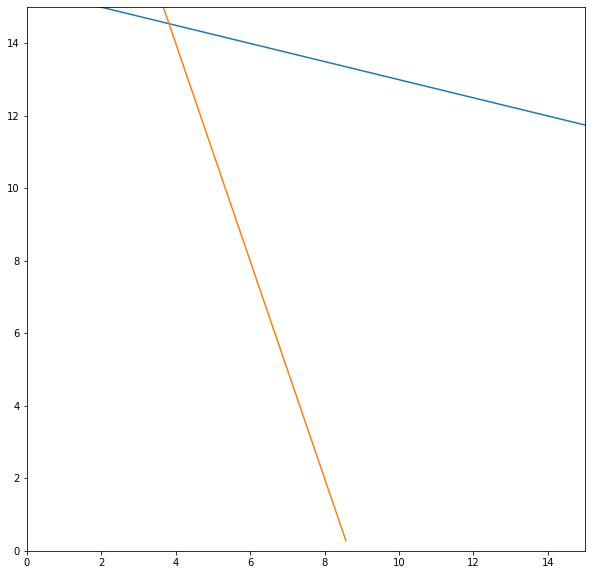

In [24]:
plot_problem_space(c, A, b, X_grid)
plt.show()

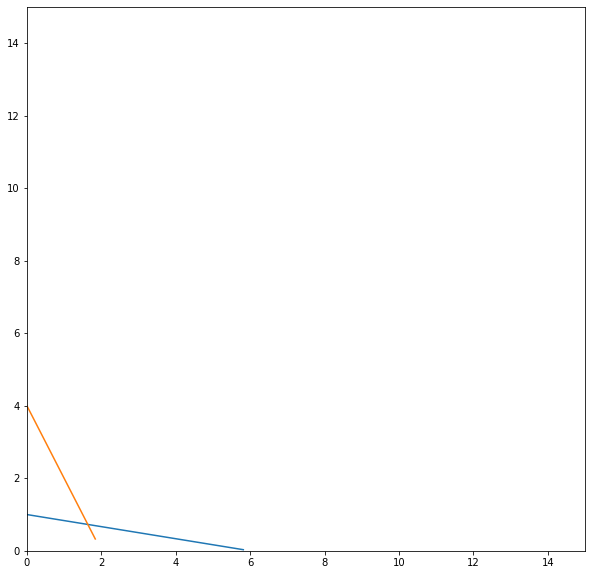

In [25]:
plot_problem_space(c_D, A_D, b_D, X_grid)
plt.show()

In [26]:
def plot_objective_space(c, A, b, X_grid):
    num_vars = len(c)

    X1, X2 = np.meshgrid(X_grid, X_grid)
    Z = c[0]*X1 + c[1]*X2

#     %matplotlib qt 
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.contour3D(X1, X2, Z, 100, cmap='black', edgecolor='none', alpha=0.3)

/Users/chatty/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  import sys
/Users/chatty/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  # Remove the CWD from sys.path while we load stuff.
/Users/chatty/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: No contour levels were found within the data range.
  from ipykernel import kernelapp as app
/Users/chatty/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  from ipykernel import kernelapp as app


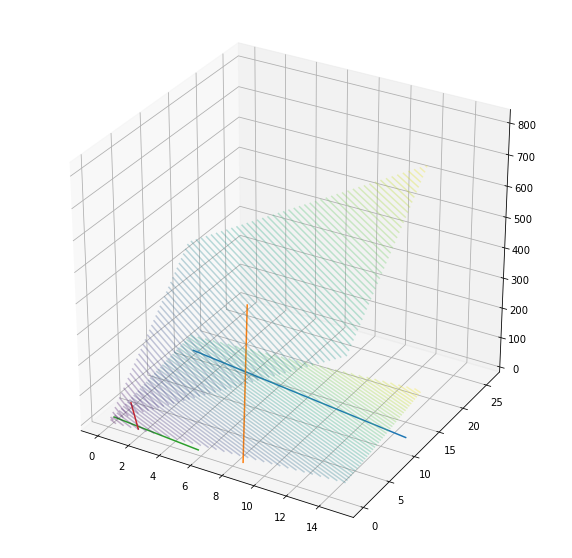

In [27]:
# %matplotlib qt 
fig = plt.figure(figsize=(10, 10))
X1, X2 = np.meshgrid(X_grid, X_grid)
Z = c[0]*X1 + c[1]*X2

ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Z, 100, cmap='viridis', edgecolor='none', alpha=0.3)

Z_D = c_D[0]*X1 + c_D[1]*X2
ax.contour3D(X1, X2, Z_D, 100, edgecolor='none', alpha=0.3)


Z_plane = Z.copy()
Z_plane[:,:]=obj_val
ax.contour3D(X1, X2, Z_plane, 100, edgecolor='none', alpha=0.3)



num_vars = len(c)
num_constr = len(b)
series = {}
for i in range(num_constr):
    x_coeff = A[i][0]
    y_coeff = A[i][1]
    intercept = b[i]

    series[i]={}
    series[i]['x'] = X_grid
    series[i]['y'] = X_grid*(-x_coeff/ y_coeff) + (intercept/ y_coeff)
    condition = series[i]['y'] >= 0
    ax.plot(series[i]['x'][condition], series[i]['y'][condition], zs=0, zdir='z')

num_vars = len(c_D)
num_constr = len(b_D)
series = {}
for i in range(num_constr):
    x_coeff = A_D[i][0]
    y_coeff = A_D[i][1]
    intercept = b_D[i]

    series[i]={}
    series[i]['x'] = X_grid
    series[i]['y'] = X_grid*(-x_coeff/ y_coeff) + (intercept/ y_coeff)
    condition = series[i]['y'] >= 0
    ax.plot(series[i]['x'][condition], series[i]['y'][condition], zs=0, zdir='z')
    
# Data for a three-dimensional line
zline = np.array([obj_val, obj_val_D])
xline = np.array([sol['x_0'], sol_D['y_0']])
yline = np.array([sol['x_1'], sol_D['y_1']])
# ax.plot3D(xline, yline, zline, 'gray')

In [28]:
Z

array([[  0.        ,   0.91836735,   1.83673469, ...,  43.16326531,
         44.08163265,  45.        ],
       [  1.2244898 ,   2.14285714,   3.06122449, ...,  44.3877551 ,
         45.30612245,  46.2244898 ],
       [  2.44897959,   3.36734694,   4.28571429, ...,  45.6122449 ,
         46.53061224,  47.44897959],
       ...,
       [ 57.55102041,  58.46938776,  59.3877551 , ..., 100.71428571,
        101.63265306, 102.55102041],
       [ 58.7755102 ,  59.69387755,  60.6122449 , ..., 101.93877551,
        102.85714286, 103.7755102 ],
       [ 60.        ,  60.91836735,  61.83673469, ..., 103.16326531,
        104.08163265, 105.        ]])

In [29]:
X1

array([[ 0.        ,  0.30612245,  0.6122449 , ..., 14.3877551 ,
        14.69387755, 15.        ],
       [ 0.        ,  0.30612245,  0.6122449 , ..., 14.3877551 ,
        14.69387755, 15.        ],
       [ 0.        ,  0.30612245,  0.6122449 , ..., 14.3877551 ,
        14.69387755, 15.        ],
       ...,
       [ 0.        ,  0.30612245,  0.6122449 , ..., 14.3877551 ,
        14.69387755, 15.        ],
       [ 0.        ,  0.30612245,  0.6122449 , ..., 14.3877551 ,
        14.69387755, 15.        ],
       [ 0.        ,  0.30612245,  0.6122449 , ..., 14.3877551 ,
        14.69387755, 15.        ]])

In [30]:
X2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30612245,  0.30612245,  0.30612245, ...,  0.30612245,
         0.30612245,  0.30612245],
       [ 0.6122449 ,  0.6122449 ,  0.6122449 , ...,  0.6122449 ,
         0.6122449 ,  0.6122449 ],
       ...,
       [14.3877551 , 14.3877551 , 14.3877551 , ..., 14.3877551 ,
        14.3877551 , 14.3877551 ],
       [14.69387755, 14.69387755, 14.69387755, ..., 14.69387755,
        14.69387755, 14.69387755],
       [15.        , 15.        , 15.        , ..., 15.        ,
        15.        , 15.        ]])

In [31]:
Z_plane = Z.copy()

In [32]:
Z_plane[:,:]=obj_val

In [33]:
Z_plane

array([[69.63636364, 69.63636364, 69.63636364, ..., 69.63636364,
        69.63636364, 69.63636364],
       [69.63636364, 69.63636364, 69.63636364, ..., 69.63636364,
        69.63636364, 69.63636364],
       [69.63636364, 69.63636364, 69.63636364, ..., 69.63636364,
        69.63636364, 69.63636364],
       ...,
       [69.63636364, 69.63636364, 69.63636364, ..., 69.63636364,
        69.63636364, 69.63636364],
       [69.63636364, 69.63636364, 69.63636364, ..., 69.63636364,
        69.63636364, 69.63636364],
       [69.63636364, 69.63636364, 69.63636364, ..., 69.63636364,
        69.63636364, 69.63636364]])

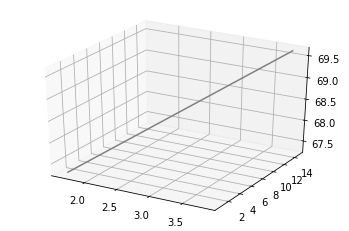

In [34]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.array([obj_val, obj_val_D])
xline = np.array([sol['x_0'], sol_D['y_0']])
yline = np.array([sol['x_1'], sol_D['y_1']])
ax.plot3D(xline, yline, zline, 'gray')

In [35]:
zline

array([69.63636364, 67.27272727])